# Introduction to Convolutional Neural Networks (CNN)

### Introduction:
Convolutional Neural Networks (CNNs) are a specialized type of deep learning model widely used for processing and analyzing visual data, such as images and videos. CNNs have achieved remarkable success in computer vision tasks, including image classification, object detection, and image segmentation. They are designed to automatically learn hierarchical representations of visual patterns directly from raw pixel data.


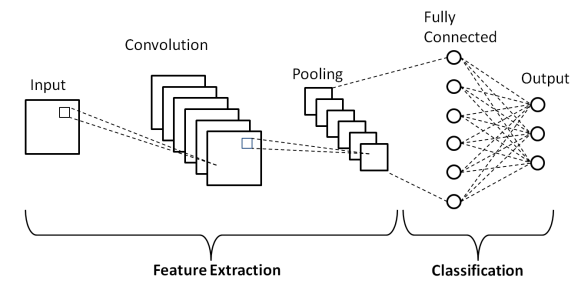



### Key Concepts of CNNs:

**Convolutional Layers**: The core building blocks of CNNs are convolutional layers. These layers apply a set of learnable filters (also known as kernels) to the input data. The filters perform local receptive field operations, scanning the input and producing feature maps that capture different aspects of the data. Convolutional layers enable the network to extract meaningful visual features and learn spatial hierarchies.

**Pooling Layers**: Pooling layers are typically used after convolutional layers to downsample the feature maps. They reduce the spatial dimensions while retaining the most salient information. Common pooling operations include max pooling and average pooling, which extract the maximum or average value within each pooling region, respectively. Pooling helps to reduce the computational complexity and makes the network more robust to spatial translations.

**Activation Functions**: Activation functions introduce non-linearities into the network, allowing it to model complex relationships. Common activation functions used in CNNs include ReLU (Rectified Linear Unit), which sets negative values to zero, and softmax, which produces normalized probabilities for multi-class classification tasks.

**Fully Connected Layers**: Towards the end of the CNN architecture, one or more fully connected layers are often employed. These layers connect every neuron in one layer to every neuron in the subsequent layer. Fully connected layers aggregate information from the previous layers and perform the final classification or regression.

**Training and Backpropagation**: CNNs are trained using the backpropagation algorithm, where the network adjusts its weights and biases to minimize a loss function. This process involves forward propagation to compute predictions, comparing them to the ground truth, and backpropagating the errors to update the network parameters using gradient descent or its variants.

### Applications of CNNs:
CNNs have demonstrated outstanding performance in various computer vision tasks, including:

**Image Classification**: Assigning labels to images from a predefined set of classes.
**Object Detection**: Locating and classifying objects within an image.
**Image Segmentation**: Assigning a label to each pixel, separating objects from the background.
**Facial Recognition**: Identifying and verifying individuals based on facial features.
**Medical Image Analysis**: Diagnosing diseases and detecting abnormalities in medical images.
**Autonomous Driving**: Analyzing road scenes and detecting objects for self-driving vehicles.


In [1]:
import tensorflow as tf
from tensorflow.keras import layers

2023-06-08 13:57:36.070278: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-08 13:57:38.669216: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-08 13:57:38.706237: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-08 13:57:50.908013: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Create a CNN model
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [4]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [5]:
from tensorflow.keras.datasets import  cifar10
# Load the dataset (e.g., CIFAR-10)
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [6]:
train_images.max()

255

In [7]:
train_images =train_images/train_images.max()
test_images = test_images/test_images.max()

In [8]:
# CIFAR-10 class labels
class_labels = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

In [9]:
# Train the model
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

2023-06-08 13:58:20.662272: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/10


/home/mr-robot/anaconda3/lib/python3.10/site-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 [==============================] - 88s 54ms/step - loss: 1.5743 - accuracy: 0.4265 - val_loss: 1.3887 - val_accuracy: 0.5011
Epoch 2/10
1563/1563 [==============================] - 96s 61ms/step - loss: 1.2184 - accuracy: 0.5689 - val_loss: 1.1369 - val_accuracy: 0.5940
Epoch 3/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.0661 - accuracy: 0.6243 - val_loss: 1.1029 - val_accuracy: 0.6148
Epoch 4/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.9668 - accuracy: 0.6572 - val_loss: 0.9778 - val_accuracy: 0.6581
Epoch 5/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.8962 - accuracy: 0.6866 - val_loss: 0.9660 - val_accuracy: 0.6522
Epoch 6/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8370 - accuracy: 0.7060 - val_loss: 0.8910 - val_accuracy: 0.6927
Epoch 7/10
 745/1563 [=============>................] - ETA: 33s - loss: 0.7864 - accuracy: 0.7250

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

2023-06-08 13:45:47.576022: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 30720000 exceeds 10% of free system memory.


ValueError: in user code:

    File "/home/mr-robot/anaconda3/lib/python3.10/site-packages/keras/engine/training.py", line 1852, in test_function  *
        return step_function(self, iterator)
    File "/home/mr-robot/anaconda3/lib/python3.10/site-packages/keras/engine/training.py", line 1836, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/mr-robot/anaconda3/lib/python3.10/site-packages/keras/engine/training.py", line 1824, in run_step  **
        outputs = model.test_step(data)
    File "/home/mr-robot/anaconda3/lib/python3.10/site-packages/keras/engine/training.py", line 1788, in test_step
        y_pred = self(x, training=False)
    File "/home/mr-robot/anaconda3/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/mr-robot/anaconda3/lib/python3.10/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 64, 64, 3), found shape=(None, 32, 32, 3)
